In [109]:
import pandas as pd
import os
from cdcqr.data.dataloader import data_loader
from cdcqr.common.stats_utils import winsorize_df, remove_outlier
import seaborn as sns
import numpy as np
from cdcqr.data.deribit.data_utils import DeribitUtils
import time
from cdcqr.common.utils import print_time_from_t0
import warnings
warnings.filterwarnings("ignore")

#### load quote data for options

In [3]:

date = "2021-10-01"
data_type = "quotes" #"quotes"

In [198]:
df1= data_loader('deribit',"2021-10-01","quotes",'BTC-PERPETUAL')

In [ ]:
df1

#### load trade data for options

In [22]:
df_opt_quote = data_loader('deribit',"2021-10-01","quotes",'options').pipe(DeribitUtils.parse_optSymbol_col).pipe(DeribitUtils.parse_time_col)
df_opt_quote.head(2)

'parse_optSymbol_col'  7.99 sec


,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,instrument,expire,strike,type,timestamp_dt,t2m
0,deribit,ETH-8OCT21-5200-C,1633046396122000,1633046400271575,20.0,0.0005,NaN,NaN,ETH,2021-10-08 08:00:00,5200.0,C,2021-09-30 23:59:56.122,177.0
1,deribit,ETH-8OCT21-5000-C,1633046396120000,1633046400272357,42.0,0.0005,NaN,NaN,ETH,2021-10-08 08:00:00,5000.0,C,2021-09-30 23:59:56.120,177.0


In [23]:
df_opt_trade = data_loader('deribit',"2021-10-01","trades",'options').pipe(DeribitUtils.parse_optSymbol_col).pipe(DeribitUtils.parse_time_col)
df_opt_trade.head(2)

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount,instrument,expire,strike,type,timestamp_dt,t2m
0,deribit,BTC-1OCT21-41000-P,1633046440859000,1633046440869016,182252460,sell,0.0005,0.1,BTC,2021-10-01 08:00:00,41000.0,P,2021-10-01 00:00:40.859,8.0
1,deribit,BTC-1OCT21-41000-P,1633046440859000,1633046440869016,182252461,sell,0.0005,0.2,BTC,2021-10-01 08:00:00,41000.0,P,2021-10-01 00:00:40.859,8.0


In [6]:
df_opt_trade['dvol'] = df_opt_trade['price']*df_opt_trade['amount']

In [7]:
df_opt_trade['symbol'].unique()

array(['BTC-1OCT21-41000-P', 'BTC-15OCT21-40000-P', 'BTC-2OCT21-42000-P',
       'ETH-22OCT21-4000-C', 'BTC-2OCT21-43000-C', 'BTC-2OCT21-44000-C',
       'BTC-1OCT21-44000-C', 'BTC-1OCT21-44000-P', 'ETH-1OCT21-3000-P',
       'BTC-30SEP22-150000-C', 'BTC-29OCT21-40000-C',
       'BTC-22OCT21-55000-C', 'ETH-15OCT21-2000-P', 'BTC-8OCT21-43000-C',
       'BTC-29OCT21-45000-C', 'BTC-8OCT21-36000-P', 'BTC-8OCT21-30000-P',
       'ETH-2OCT21-3150-C', 'BTC-2OCT21-43000-P', 'BTC-25MAR22-80000-C',
       'BTC-1OCT21-46000-C', 'BTC-22OCT21-42000-P',
       'BTC-31DEC21-100000-C', 'ETH-1OCT21-3250-C', 'ETH-2OCT21-2900-P',
       'BTC-1OCT21-41000-C', 'BTC-1OCT21-42000-C', 'BTC-1OCT21-43000-P',
       'ETH-29OCT21-3000-C', 'ETH-29OCT21-2600-P', 'BTC-2OCT21-44000-P',
       'BTC-2OCT21-45000-C', 'BTC-8OCT21-40000-P', 'ETH-2OCT21-2600-P',
       'BTC-8OCT21-48000-C', 'ETH-2OCT21-2850-P', 'BTC-8OCT21-46000-C',
       'BTC-1OCT21-45000-C', 'BTC-8OCT21-41000-P', 'BTC-8OCT21-52000-C',
       'ETH-2OCT21

### check liquidity - number of trades

In [13]:
trade_info = df_opt_trade.groupby('symbol')['dvol'].agg(['sum','count']).sort_values(['count','sum'], ascending=[False,False]).reset_index()
trade_info.head()

,symbol,sum,count
0,BTC-8OCT21-50000-C,7.85985,279
1,BTC-8OCT21-52000-C,7.29320,269
2,BTC-8OCT21-48000-C,13.92724,244
3,BTC-31DEC21-200000-C,0.89030,226
4,ETH-8OCT21-3400-C,69.45700,204


In [12]:
df_opt_trade.query('symbol=="ETH-24JUN22-4000-C"')

,exchange,symbol,timestamp,local_timestamp,id,side,price,amount,dvol
2434,deribit,ETH-24JUN22-4000-C,1633073223880000,1633073223889378,ETH-96276168,buy,0.2655,30.0,7.9650
2437,deribit,ETH-24JUN22-4000-C,1633073223908000,1633073223930781,ETH-96276171,sell,0.2655,30.0,7.9650
2528,deribit,ETH-24JUN22-4000-C,1633073415760000,1633073415768297,ETH-96277922,sell,0.2655,80.0,21.2400
2555,deribit,ETH-24JUN22-4000-C,1633073442094000,1633073442103807,ETH-96278265,buy,0.2670,12.0,3.2040
2556,deribit,ETH-24JUN22-4000-C,1633073442094000,1633073442103807,ETH-96278266,buy,0.2670,36.0,9.6120
2583,deribit,ETH-24JUN22-4000-C,1633073483311000,1633073483323218,ETH-96278629,buy,0.2680,7.0,1.8760
2584,deribit,ETH-24JUN22-4000-C,1633073483311000,1633073483323218,ETH-96278630,buy,0.2680,36.0,9.6480
2907,deribit,ETH-24JUN22-4000-C,1633074225858000,1633074225866383,ETH-96284734,sell,0.2680,152.0,40.7360
4652,deribit,ETH-24JUN22-4000-C,1633078503477000,1633078503488980,ETH-96309646,sell,0.2705,36.0,9.7380
6703,deribit,ETH-24JUN22-4000-C,1633084724417000,1633084724440062,ETH-96336952,buy,0.2830,86.0,24.3380


In [9]:
trade_info['type'] = trade_info['symbol'].str.contains('-C')
trade_info.head()

,symbol,sum,count,type
0,ETH-24JUN22-4000-C,769.0045,38,True
1,ETH-24JUN22-5000-C,610.0320,31,True
2,ETH-8OCT21-3200-C,208.9790,141,True
3,ETH-31DEC21-4000-P,182.3205,19,False
4,ETH-29OCT21-3600-C,166.3315,108,True


<AxesSubplot:xlabel='count', ylabel='sum'>

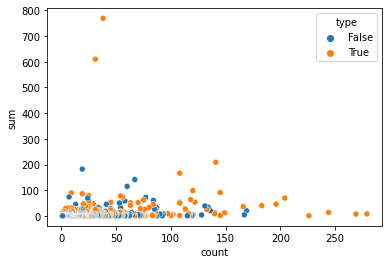

In [ ]:
sns.scatterplot(x="count", y="sum", data=trade_info, hue="type")

In [15]:
trade_info_rmoutlier = remove_outlier(trade_info, cols2limits={'count':[0.1,0.9],'sum':[0.1,0.9]})

<AxesSubplot:xlabel='count', ylabel='sum'>

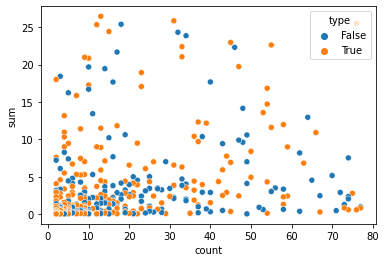

In [17]:
sns.scatterplot(x="count", y="sum", data=trade_info_rmoutlier, hue="type")

### identify trade/remove liquidity

In [195]:
ATM_btc_c = 'BTC-8OCT21-48000-C'
df_opt_trade_i = df_opt_trade.query('symbol==@ATM_btc_c')
df_opt_trade_i.head()
display(df_opt_trade_i.shape)

(244, 14)

In [135]:
df_opt_trade_i['flow_sgn'] = (df_opt_trade_i['side']=='buy').astype(int)
df_opt_trade_i['flow_sgn'] = (df_opt_trade_i['flow_sgn']-0.5)*2
df_opt_trade_i['flow'] = df_opt_trade_i['flow_sgn']*df_opt_trade_i['amount']
df_opt_trade_i_no_dup = df_opt_trade_i.groupby('timestamp_dt')['flow'].sum().reset_index()

In [136]:
df_opt_trade_i_no_dup.shape

(224, 2)

In [137]:
df_opt_quote_i = df_opt_quote.query('symbol==@ATM_btc_c')
df_opt_quote_i_no_dup = df_opt_quote_i[~df_opt_quote_i['timestamp_dt'].duplicated(keep='last')]
df_opt_quote_i_no_dup.head()

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,instrument,expire,strike,type,timestamp_dt,t2m
301,deribit,BTC-8OCT21-48000-C,1633046399032000,1633046400368150,30.4,0.01,0.009,16.7,BTC,2021-10-08 08:00:00,48000.0,C,2021-09-30 23:59:59.032,177.0
775,deribit,BTC-8OCT21-48000-C,1633046403664000,1633046403672936,30.4,0.01,0.009,38.6,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:00:03.664,176.0
1012,deribit,BTC-8OCT21-48000-C,1633046412072000,1633046412240119,30.4,0.01,0.009,37.7,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:00:12.072,176.0
1204,deribit,BTC-8OCT21-48000-C,1633046415023000,1633046415031956,30.4,0.01,0.009,15.8,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:00:15.023,176.0
3041,deribit,BTC-8OCT21-48000-C,1633046465787000,1633046465795261,27.4,0.01,0.009,15.8,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:01:05.787,176.0


In [138]:
df_opt_quote_i_no_dup.shape

(31306, 14)

In [130]:
df_opt_trade_i_no_dup = df_opt_trade_i_no_dup.rename(columns={'timestamp_dt':'trade_time'})

In [152]:
B = df_opt_quote_i_no_dup['timestamp_dt'].values
A = df_opt_trade_i_no_dup['trade_time'].values
res = B[np.searchsorted(B, A)]
df_opt_trade_i_no_dup['timestamp_dt'] = res

In [157]:
df_opt_trade_i_no_dup2 = df_opt_trade_i_no_dup.groupby('timestamp_dt')['flow'].sum().reset_index()

df_opt_trade_i_no_dup2['has_trade'] = True

In [159]:
df_opt_trade_i_no_dup2.head(2)

,timestamp_dt,flow,has_trade
0,2021-10-01 00:26:45.977,0.2,True
1,2021-10-01 00:32:37.723,-1.0,True


In [146]:
df_opt_quote_i_no_dup.head(2)

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,instrument,expire,strike,type,timestamp_dt,t2m
301,deribit,BTC-8OCT21-48000-C,1633046399032000,1633046400368150,30.4,0.01,0.009,16.7,BTC,2021-10-08 08:00:00,48000.0,C,2021-09-30 23:59:59.032,177.0
775,deribit,BTC-8OCT21-48000-C,1633046403664000,1633046403672936,30.4,0.01,0.009,38.6,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:00:03.664,176.0


In [160]:
df_combined = pd.merge(left=df_opt_quote_i_no_dup, right=df_opt_trade_i_no_dup2, on=['timestamp_dt'], how='left')

In [172]:
df_combined['flow'] = df_combined['flow'].fillna(0)

df_combined['trade_neighbour'] = df_combined['has_trade']

df_combined['trade_neighbour'] =df_combined['has_trade'].ffill(limit=1).bfill(limit=1).fillna(False)

In [178]:
df_combined[df_combined['trade_neighbour']].head(2)

,exchange,symbol,timestamp,local_timestamp,ask_amount,ask_price,bid_price,bid_amount,instrument,expire,strike,type,timestamp_dt,t2m,flow,has_trade,trade_neighbour,mid_price,wgt_mid_price
272,deribit,BTC-8OCT21-48000-C,1633047981777000,1633047981784940,0.2,0.0095,0.009,51.2,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:26:21.777,176.0,0.0,NaN,True,0.00925,0.009002
273,deribit,BTC-8OCT21-48000-C,1633048005977000,1633048005985871,24.9,0.0100,0.009,51.2,BTC,2021-10-08 08:00:00,48000.0,C,2021-10-01 00:26:45.977,176.0,0.2,True,True,0.00950,0.009327


In [186]:
df_combined['mid_price'] = (df_combined['ask_price'] + df_combined['bid_price'])/2
df_combined['wgt_mid_price'] = (df_combined['ask_price']*df_combined['ask_amount'] + df_combined['bid_price']*df_combined['bid_amount'])/(df_combined['ask_amount']+df_combined['bid_amount'])

df_combined['midp_chg'] = df_combined['mid_price'].pct_change()
df_combined['wgtmidp_chg'] = df_combined['wgt_mid_price'].pct_change()

In [185]:
display('num trades: {}'.format(df_combined['has_trade'].sum()))
display('midp_chg: {}'.format((df_combined['midp_chg']!=0).sum()))
display('wgtmidp_chg: {}'.format((df_combined['wgtmidp_chg']!=0).sum()))

'num trades: 220'

'midp_chg: 4877'

'wgtmidp_chg: 31305'

In [191]:
def get_order_book_dynamics(contract='BTC-8OCT21-48000-C', date ="2021-10-01" , symbol='options', exchange='deribit'):
    display('BTC-8OCT21-48000-C', "2021-10-01", 'deribit')
    df_opt_quote = data_loader(exchange, date,"quotes",symbol).pipe(DeribitUtils.parse_optSymbol_col).pipe(DeribitUtils.parse_time_col)
    df_opt_trade = data_loader(exchange, date,"trades",symbol).pipe(DeribitUtils.parse_optSymbol_col).pipe(DeribitUtils.parse_time_col)
    ATM_btc_c = contract
    
    # processing trade info
    df_opt_trade_i = df_opt_trade.query('symbol==@ATM_btc_c')
    df_opt_trade_i['flow_sgn'] = (df_opt_trade_i['side']=='buy').astype(int)
    df_opt_trade_i['flow_sgn'] = (df_opt_trade_i['flow_sgn']-0.5)*2
    df_opt_trade_i['flow'] = df_opt_trade_i['flow_sgn']*df_opt_trade_i['amount']
    df_opt_trade_i_no_dup = df_opt_trade_i.groupby('timestamp_dt')['flow'].sum().reset_index()
    df_opt_trade_i_no_dup = df_opt_trade_i_no_dup.rename(columns={'timestamp_dt':'trade_time'})
    
    
    # processing quote info
    df_opt_quote_i = df_opt_quote.query('symbol==@ATM_btc_c')
    df_opt_quote_i_no_dup = df_opt_quote_i[~df_opt_quote_i['timestamp_dt'].duplicated(keep='last')]
    
    # align timestamps
    B = df_opt_quote_i_no_dup['timestamp_dt'].values
    A = df_opt_trade_i_no_dup['trade_time'].values
    res = B[np.searchsorted(B, A)]
    df_opt_trade_i_no_dup['timestamp_dt'] = res
    
    df_opt_trade_i_no_dup2 = df_opt_trade_i_no_dup.groupby('timestamp_dt')['flow'].sum().reset_index()
    df_opt_trade_i_no_dup2['has_trade'] = True
    
    # combine
    df_combined = pd.merge(left=df_opt_quote_i_no_dup, right=df_opt_trade_i_no_dup2, on=['timestamp_dt'], how='left')
    
    # adding features
    df_combined['flow'] = df_combined['flow'].fillna(0)
    df_combined['trade_neighbour'] = df_combined['has_trade']
    df_combined['trade_neighbour'] =df_combined['has_trade'].ffill(limit=1).bfill(limit=1).fillna(False)
    
    df_combined['mid_price'] = (df_combined['ask_price'] + df_combined['bid_price'])/2
    df_combined['wgt_mid_price'] = (df_combined['ask_price']*df_combined['ask_amount'] + df_combined['bid_price']*df_combined['bid_amount'])/(df_combined['ask_amount']+df_combined['bid_amount'])
    df_combined['midp_chg'] = df_combined['mid_price'].pct_change()
    df_combined['wgtmidp_chg'] = df_combined['wgt_mid_price'].pct_change()
    
    num_trades = df_combined['has_trade'].sum()
    num_midp_chg = (df_combined['midp_chg']!=0).sum()
    num_wgtmidp_chg = (df_combined['wgtmidp_chg']!=0).sum()
    return {'num_trades':num_trades,'num_midp_chg':num_midp_chg,'num_wgtmidp_chg':num_wgtmidp_chg}, df_combined

In [193]:
ret_dict, ret_df = get_order_book_dynamics()

'BTC-8OCT21-48000-C'

'2021-10-01'

'deribit'

'parse_optSymbol_col'  8.15 sec


In [194]:
ret_dict

{'num_trades': 220, 'num_midp_chg': 4877, 'num_wgtmidp_chg': 31305}